In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/condon-usage-dataset/codon_usage.csv


#  **Getting Started**

#### **Title : Genetic Code**

#### **Description**

**We will predict the kingdom of each gene**.

> **bct (bacteria)** 

> **inv (invertebrates)** 

> **mam (mammals)** 

> **pln (plants)** 

> **pri (primates)** 

> **rod (rodents)** 

> **vrt (vertebrates)**

In [2]:
# Read .csv file into pandas dataframe
data = pd.read_csv('/kaggle/input/condon-usage-dataset/codon_usage.csv', low_memory=False)
data=data.set_index('SpeciesID')
data.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
100220,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
100755,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
100880,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
100887,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


# **STEP 01 - ⚙️ Data Pre Processing**

In [3]:
# Checking the shape of data 
print("The shape of data of is " ,data.shape)
# info of data 
data.info()

The shape of data of is  (13028, 68)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13028 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   Ncodons      13028 non-null  int64  
 3   SpeciesName  13028 non-null  object 
 4   UUU          13028 non-null  object 
 5   UUC          13028 non-null  object 
 6   UUA          13028 non-null  float64
 7   UUG          13028 non-null  float64
 8   CUU          13028 non-null  float64
 9   CUC          13028 non-null  float64
 10  CUA          13028 non-null  float64
 11  CUG          13028 non-null  float64
 12  AUU          13028 non-null  float64
 13  AUC          13028 non-null  float64
 14  AUA          13028 non-null  float64
 15  AUG          13028 non-null  float64
 16  GUU          13028 non-null  float64
 17  GUC          13028 non-null  float64
 18  GUA  

<AxesSubplot:ylabel='SpeciesID'>

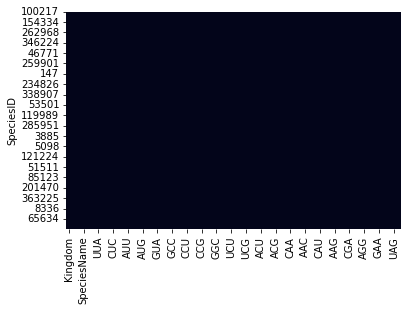

In [4]:
# Checking for null values
import seaborn as sns 
sns.heatmap(data.isnull(), cbar=False)

In [5]:
# lets check some value_counts for kingdom 
data['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

**We can use two approaches for solving this data. The first one is we will apply the label encoding technique & One Hot Encoding on Kingdom feature data but this technique we will apply if we are using logistic regression or other models. But we are using DTC & Random forest so thats why this technique is not needed also we are getting better accuracy from DTC and random forest. If I'm wrong please correct me. 😉**

# **STEP - 02 😀 Data Transformation**

In [6]:
# Columns is a float value with type object we have to change the data type
data['UUU']=data['UUU'].replace(['non-B hepatitis virus','12;I'],'NaN')
data['UUC']=data['UUC'].replace('-','NaN')
data['UUU'] = data['UUU'].astype('float32')
data['UUC'] = data['UUC'].astype('float32')
data.dropna(inplace=True)

In [7]:
# spilt dataset into X & Y 
X = data.drop(columns = ['Kingdom','SpeciesName'], axis = 1 )
y = data['Kingdom']

In [8]:
# lets chk the shape of X
print("The shape of is X ", X.shape)
print("The shape of is y ", y.shape)

The shape of is X  (13026, 66)
The shape of is y  (13026,)


In [9]:
# Describe the dataset
X.describe()

,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026.000000,1.302600e+04,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,0.367265,7.961776e+04,0.024818,0.023440,0.020637,0.014104,0.017821,0.018287,0.019045,0.018452,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,0.688764,7.197556e+05,0.017628,0.011598,0.020710,0.009280,0.010587,0.014573,0.024252,0.016578,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.602000e+03,0.013910,0.015380,0.005610,0.007102,0.010890,0.007830,0.005302,0.007180,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,2.929000e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,0.012800,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,9.120000e+03,0.031307,0.029210,0.029495,0.019808,0.022730,0.025110,0.017255,0.024325,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031127,0.002370,0.000830,0.002890
max,12.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

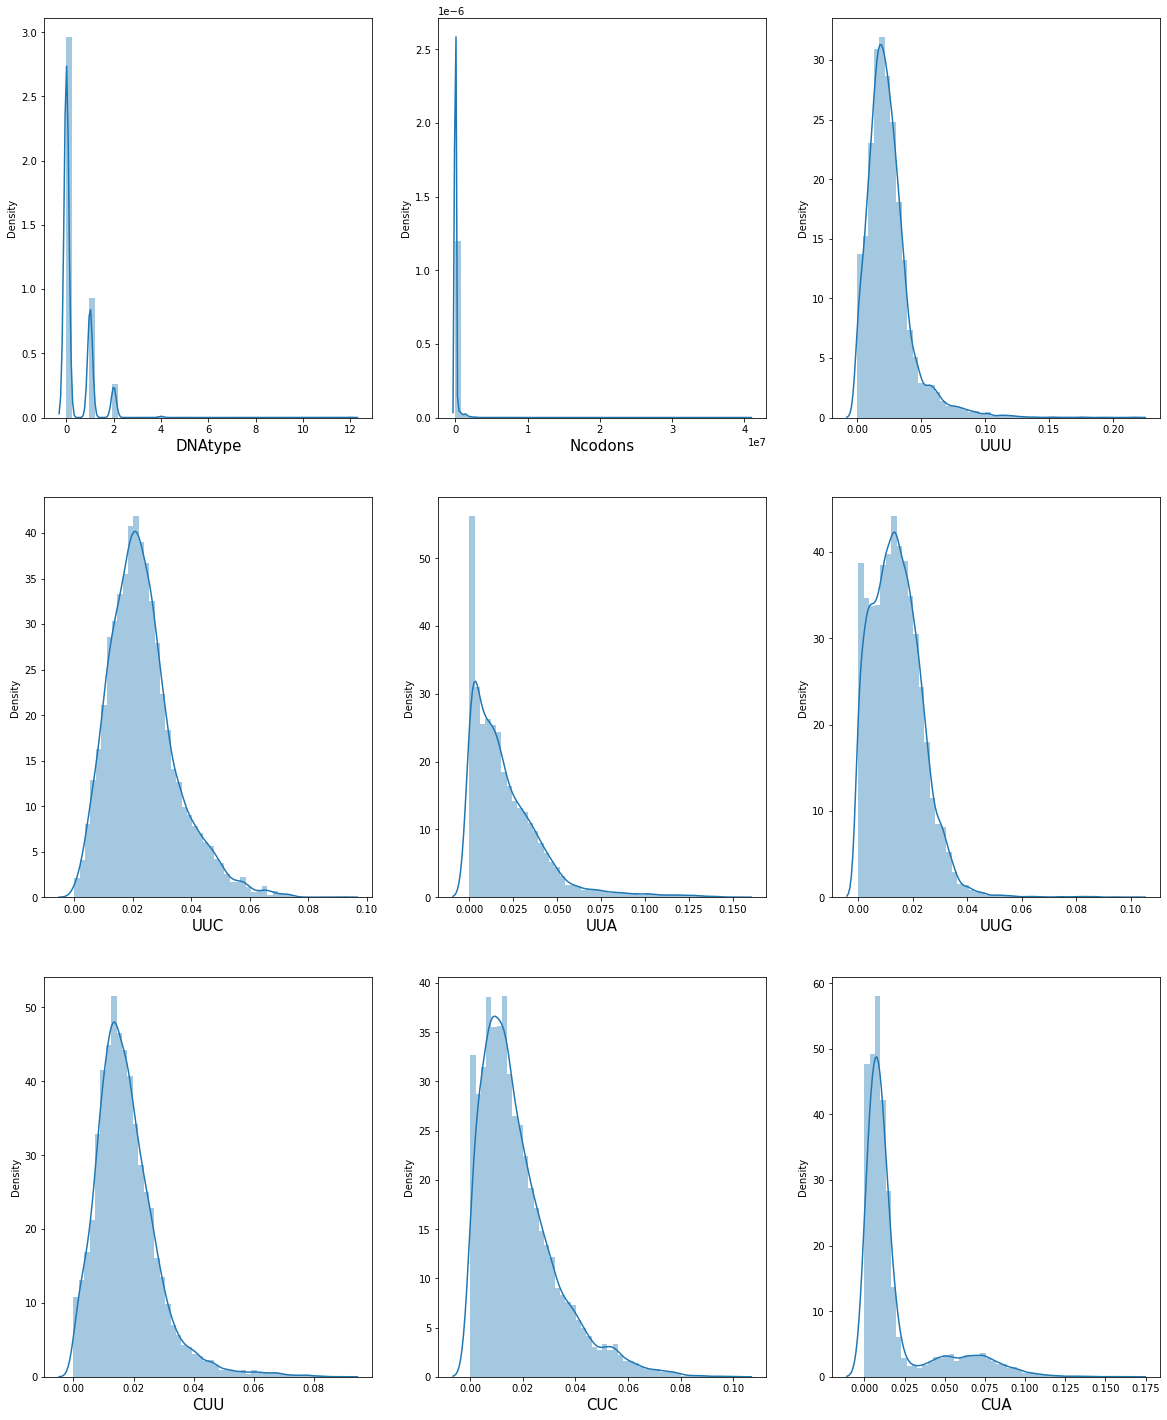

In [10]:
# let's see how data is distributed for every column.
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

**We can see that the distribution of data is normal. we will move further.**

In [11]:
# Checking the value counts of target variable
y.value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

# **STEP - 03 ✨ Model Preparation**

In [12]:
# splitting the data into testing and training data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### **STEP - 04 🙇 Model Building**

**We will train Decision tree, Random forest & at last we will select our best model.**

In [13]:
# Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.7684986183604544


**We will apply some Hyperametertuing on DTC model for better accuracy.**

In [14]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 20.3min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [15]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.7768451653781995


In [16]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.8864776333299211
Test Accuracy of Decesion Tree Model is 0.775253300583359


In [17]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9577234107892313
Test Accuracy of Random Forest Model is 0.8719680687749463


# **🔥 Best Model.**

***We will select Random forest becuase it gives best accuracy of 95%. We will use Random Forest Model for production.***

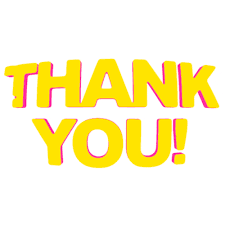

**If you like the notebook please upvote & give your valubale suggestions for improvment ❤️**